### Import

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection 
from sklearn import preprocessing
from sklearn import metrics
from sklearn import neighbors
from sklearn import svm
from sklearn import decomposition
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest, f_classif


### Load data

In [3]:
def load_data():
    # this_directory = os.path.dirname(os.path.abspath(__file__))
    data = pd.read_csv(os.path.join('hn', 'HN_radiomicFeatures.csv'), index_col=0)

    return data

data = load_data()
label = data["label"]
data = data.drop(["label"], axis=1)
feature_names = data.columns.values
print(feature_names)
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')


['hf_energy' 'hf_entropy' 'hf_kurtosis' 'hf_max' 'hf_mean' 'hf_median'
 'hf_min' 'hf_peak' 'hf_quartile_range' 'hf_range' 'hf_skewness' 'hf_std'
 'of_theta_x' 'of_theta_y' 'of_theta_z' 'sf_compactness_avg_2D'
 'sf_compactness_std_2D' 'sf_convexity_avg_2D' 'sf_convexity_std_2D'
 'sf_cvar_avg_2D' 'sf_cvar_std_2D' 'sf_evar_avg_2D' 'sf_evar_std_2D'
 'sf_prax_avg_2D' 'sf_prax_std_2D' 'sf_rad_dist_avg_2D'
 'sf_rad_dist_std_2D' 'sf_roughness_avg_2D' 'sf_roughness_std_2D'
 'sf_solidity_avg_2D' 'sf_solidity_std_2D' 'sf_volume_2D'
 'tf_GLRLM_GrayLevelNonUniformity'
 'tf_GLRLM_GrayLevelNonUniformityNormalized' 'tf_GLRLM_GrayLevelVariance'
 'tf_GLRLM_HighGrayLevelRunEmphasis' 'tf_GLRLM_LongRunEmphasis'
 'tf_GLRLM_LongRunHighGrayLevelEmphasis'
 'tf_GLRLM_LongRunLowGrayLevelEmphasis' 'tf_GLRLM_LowGrayLevelRunEmphasis'
 'tf_GLRLM_RunEntropy' 'tf_GLRLM_RunLengthNonUniformity'
 'tf_GLRLM_RunLengthNonUniformityNormalized' 'tf_GLRLM_RunPercentage'
 'tf_GLRLM_RunVariance' 'tf_GLRLM_ShortRunEmphasis'
 'tf_

### Check for missing data

In [4]:
# Detect missing values in dataframe
data.isnull().values.any()

False

### Exclude features with zero variance

In [5]:
# exclude features with zero variances
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(data)
selector.fit_transform(data).shape

(113, 157)

### Data split

In [6]:
train_data, test_data, train_label, test_label = train_test_split(data, label, train_size=0.8)
# train_data, val_data, train_label, val_label = train_test_split(train_val_data, train_val_label, train_size=0.85)

print(f'The number of train samples: {train_data.shape[0]}')
# print(f'The number of validation samples: {val_data.shape[0]}')
print(f'The number of test samples: {test_data.shape[0]}')

The number of train samples: 90
The number of test samples: 23


### Scaling train data

In [7]:
scaler = StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_data = pd.DataFrame(train_data, columns=feature_names)
test_data = pd.DataFrame(test_data, columns=feature_names)

### Scaler & Linear Classifier

In [8]:
clf = SGDClassifier()
clf.fit(train_data, train_label)
print(np.shape(clf.coef_))
print(clf.intercept_)

label_train_pred = clf.predict(train_data)
print(metrics.accuracy_score(train_label, label_train_pred))

y_pred = clf.predict(test_data)
print(metrics.accuracy_score(test_label, y_pred))

(1, 159)
[-69.02791556]
1.0
0.8260869565217391


### kNN classifier

In [9]:
# Perform a PCA
pca = decomposition.PCA(n_components=10)
pca.fit(train_data)
train_pca = pca.transform(train_data)
test_pca = pca.transform(test_data)
print(sum(pca.explained_variance_ratio_))

# Fit kNN
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(train_pca, train_label)
score_train = knn.score(train_pca, train_label)
score_test = knn.score(test_pca, test_label)

# Print result
print(f"Training result: {score_train}")
print(f"Test result: {score_test}")

0.7140689972564549
Training result: 0.7555555555555555
Test result: 0.6956521739130435


### Find average accuracy over multiple classifications

In [10]:
# Find mean accuracy for 10 kNN classifications
loops = 100
score_train = np.zeros(loops)
score_test = np.zeros(loops)

for i in range(loops):
    train_data, test_data, train_label, test_label = train_test_split(data, label, train_size=0.8)
    scaler = StandardScaler().fit(train_data)
    train_data = scaler.transform(train_data)
    test_data = scaler.transform(test_data)

    # Perform a PCA
    pca = decomposition.PCA(n_components=10)
    pca.fit(train_data)
    train_pca = pca.transform(train_data)
    test_pca = pca.transform(test_data)

    # Fit kNN
    knn = neighbors.KNeighborsClassifier(n_neighbors=10)
    knn.fit(train_pca, train_label)
    score_train[i] = knn.score(train_pca, train_label)
    score_test[i] = knn.score(test_pca, test_label)

mean_score_train = np.mean(score_train)
mean_score_test = np.mean(score_test)
print(score_train)
print(score_test)
print(f"Mean training score: {mean_score_train}")
print(f"Mean test score: {mean_score_test}")

[0.75555556 0.73333333 0.75555556 0.75555556 0.74444444 0.75555556
 0.78888889 0.75555556 0.82222222 0.82222222 0.77777778 0.77777778
 0.82222222 0.8        0.74444444 0.78888889 0.77777778 0.75555556
 0.72222222 0.77777778 0.77777778 0.78888889 0.77777778 0.83333333
 0.73333333 0.77777778 0.77777778 0.73333333 0.72222222 0.77777778
 0.75555556 0.74444444 0.77777778 0.74444444 0.76666667 0.76666667
 0.76666667 0.74444444 0.8        0.73333333 0.76666667 0.74444444
 0.75555556 0.76666667 0.76666667 0.8        0.75555556 0.74444444
 0.75555556 0.76666667 0.72222222 0.72222222 0.76666667 0.73333333
 0.77777778 0.76666667 0.72222222 0.76666667 0.81111111 0.78888889
 0.74444444 0.78888889 0.77777778 0.77777778 0.8        0.72222222
 0.75555556 0.78888889 0.8        0.73333333 0.82222222 0.75555556
 0.76666667 0.77777778 0.73333333 0.8        0.8        0.77777778
 0.75555556 0.72222222 0.74444444 0.73333333 0.74444444 0.76666667
 0.77777778 0.78888889 0.72222222 0.75555556 0.75555556 0.7444

C:\Users\velde\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [142 145 146] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\velde\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


                             0
hf_energy            21.440034
hf_entropy           10.853103
hf_kurtosis           0.911568
hf_max                0.577522
hf_mean               0.953219
...                        ...
tf_NGTDM_Busyness     6.442434
tf_NGTDM_Coarseness   2.991623
tf_NGTDM_Complexity   0.092145
tf_NGTDM_Contrast     0.140294
tf_NGTDM_Strength     0.020845

[159 rows x 1 columns]


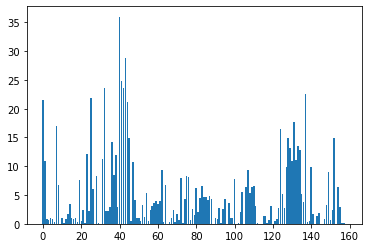

In [18]:
# You can understand the F-Scores as a measure of how informative each feature is for your dataset.
# As it is explained in the method documentation, an F-test is carried out to assess each feature. 
# The F-scores are the test statistic for the F-test, and they basically represent the ratio between the explained and the unexplained variance.

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(train_data, train_label)
scores = np.zeros(len(fs.scores_))

for i in range(len(fs.scores_)):
	# print('Feature %d: %f' % (i, fs.scores_[i]))
	scores[i] = fs.scores_[i]

scores = pd.DataFrame(scores, index=feature_names)
print(scores)

pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()